# Data Project - Stock Market Analysis
# TESSA NEJLA AYVAZOGLU

## Objective
This notebook explores stock market data, focusing on technology giants like Apple, Amazon, Google, and Microsoft. It demonstrates the use of yfinance to retrieve stock information and visualization techniques with Seaborn and Matplotlib. The analysis includes assessing stock risk using historical performance data and predicting future prices using a Linear Regression model.

![Stock Market Reactions to Election](image/unleashing-the-bulls-how-the-stock-market-achieved-unprecedented-record-levels2.jpg)

# Task Breakdown
- Identify reliable market data APIs
- Develop scripts/tools for data ingestion
- Clean and preprocess collected data
- Standardize data formats
- Explore data visualization techniques
- Perform exploratory data analysis (EDA)
- Extract relevant features from raw financial data
- Implement data transformation techniques
- Split the preprocessed data into training, validation, and test sets
- Document data collection and preprocessing procedures

# Step-by-Step Implementation

## 1. Identify reliable market data APIs

##### We'll use the yfinance library, which provides a Pythonic interface to Yahoo Finance, a reliable source for historical market data.

In [1]:

# Install necessary libraries
!pip install -q yfinance
!pip install pandas-datareader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

yf.pdr_override()

# Set plotting styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# # Download stock data for META, TSLA, NVDA, and NFLX
# META = yf.download('META', start='2023-01-01', end='2025-01-01')
# AAPL = yf.download('AAPL', start='2023-01-01', end='2025-01-01')
# NVDA = yf.download('NVDA', start='2023-01-01', end='2025-01-01')
# NFLX = yf.download('NFLX', start='2023-01-01', end='2025-01-01')

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


# 2. Develop scripts/tools for data ingestion
##### We'll create a script to download stock data for Apple, Amazon, Google, and Microsoft.

In [2]:
import pandas as pd
from datetime import datetime

#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


# Download stock data
META = yf.download('META', start=start, end=end)
AAPL = yf.download('AAPL', start=start, end=end)
NVDA = yf.download('NVDA', start=start, end=end)
NFLX = yf.download('NFLX', start=start, end=end)

company_list = [META, AAPL, NVDA, NFLX]
company_name = ["META", "APPLE", "NVIDIA", "NETFLIX"]
# for stock in tech_list:
#     globals()[stock] = yf.download(stock, start=start, end=end)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# 3. Clean and preprocess collected data
##### Add company names and concatenate data into a single DataFrame.

In [3]:
# Fill missing values using forward fill
for company in company_list:
    company.ffill(inplace=True)  # Forward fill to handle missing data

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again

# Add company name column to each dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate individual stock data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Shuffle the data and get a random sample of the last 10 rows
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data
print(df.tail(10))  # Display the last 10 rows of the shuffled dataframe

            Open        High         Low       Close   Adj Close    Volume   
998   403.589996  406.359985  399.570007  400.059998  399.635986  18614700  \
999   454.660004  466.000000  452.709991  465.660004  465.638153  37171800   
1000  600.210022  615.299988  596.270020  611.080017  611.080017   2821600   
1001  179.259995  179.699997  175.399994  175.490005  174.798660  58436200   
1002  492.109985  504.250000  491.850006  502.299988  502.299988  16273600   
1003  188.649994  189.990005  188.000000  188.850006  188.594208  45155200   
1004  405.000000  405.119995  396.929993  399.290009  399.290009   4991500   
1005  901.580017  927.669983  896.020020  926.690002  926.690002  60811900   
1006  375.600006  378.959991  371.100006  376.359985  376.359985   4369900   
1007  483.790009  487.619995  478.600006  481.399994  481.335083  38200500   

     company_name  
998          META  
999        NVIDIA  
1000      NETFLIX  
1001        APPLE  
1002         META  
1003        APPLE  
1

# 4. Standardize data formats
##### Ensure all columns have consistent formats and handle missing values.

In [4]:
df = df.reset_index()
df = df.fillna(method='ffill')

# 5. Explore data visualization techniques
##### Visualize the closing price and volume of sales.

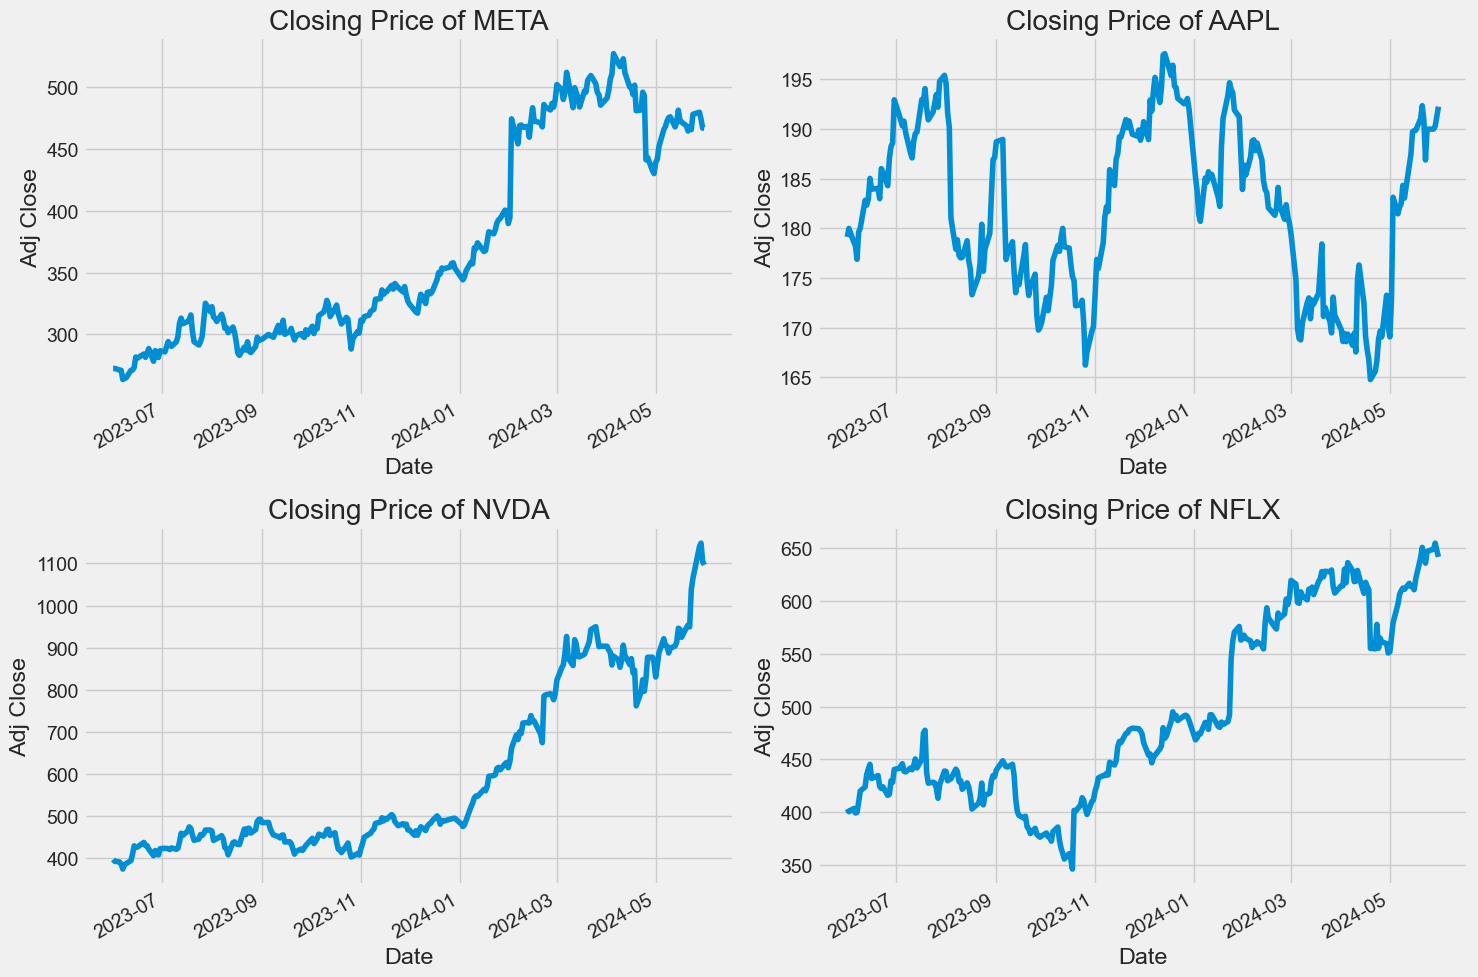

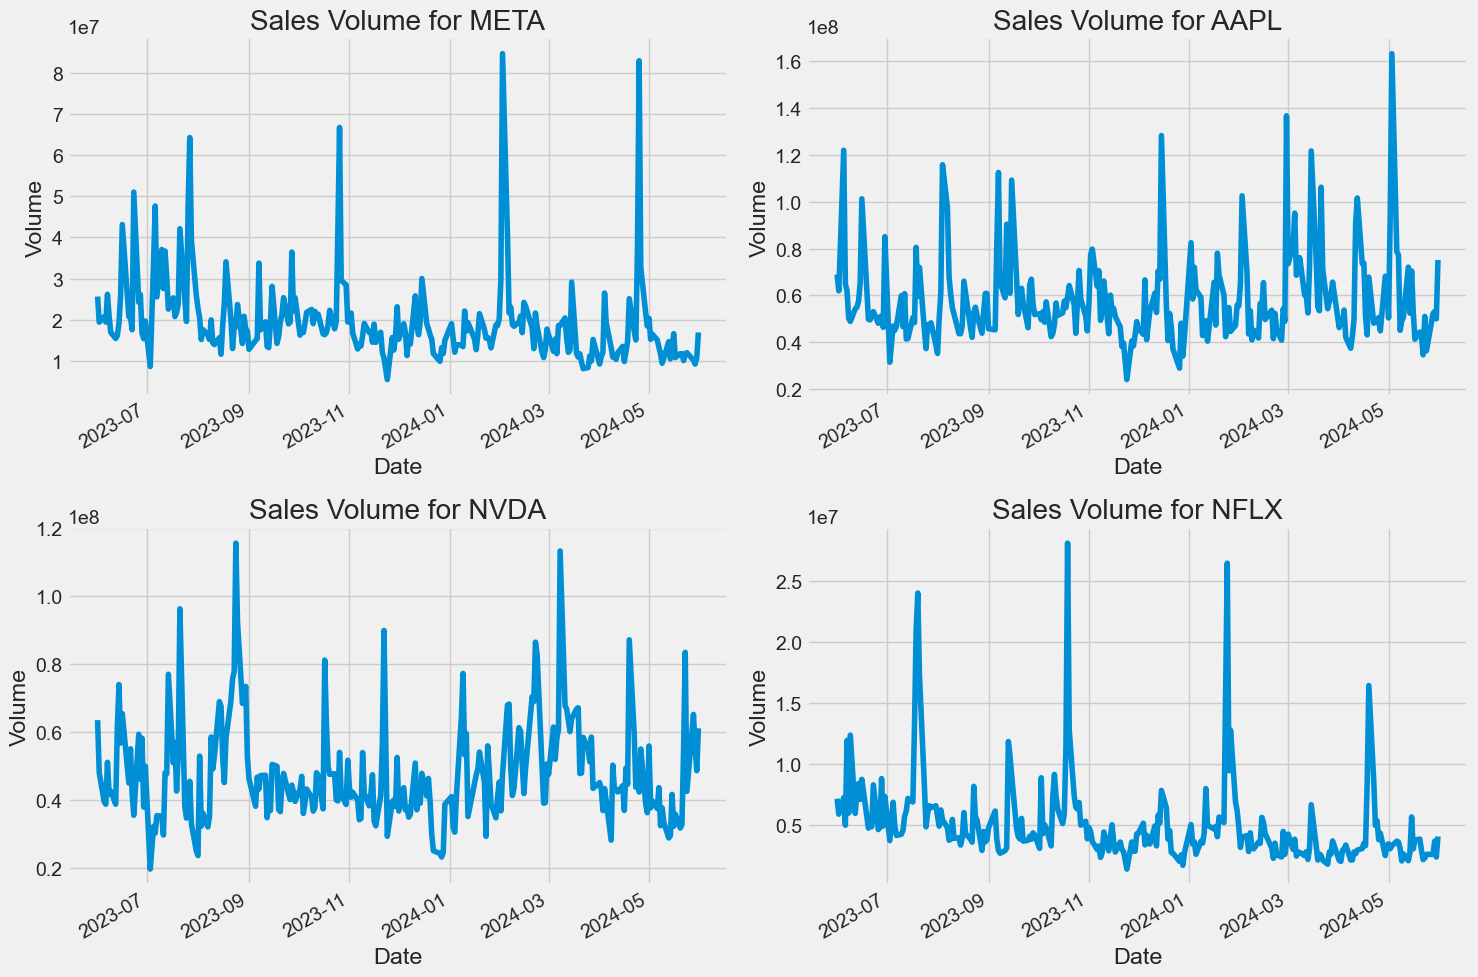

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.tight_layout()

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.tight_layout()

# 6. Perform exploratory data analysis (EDA)
##### Calculate and plot moving averages.

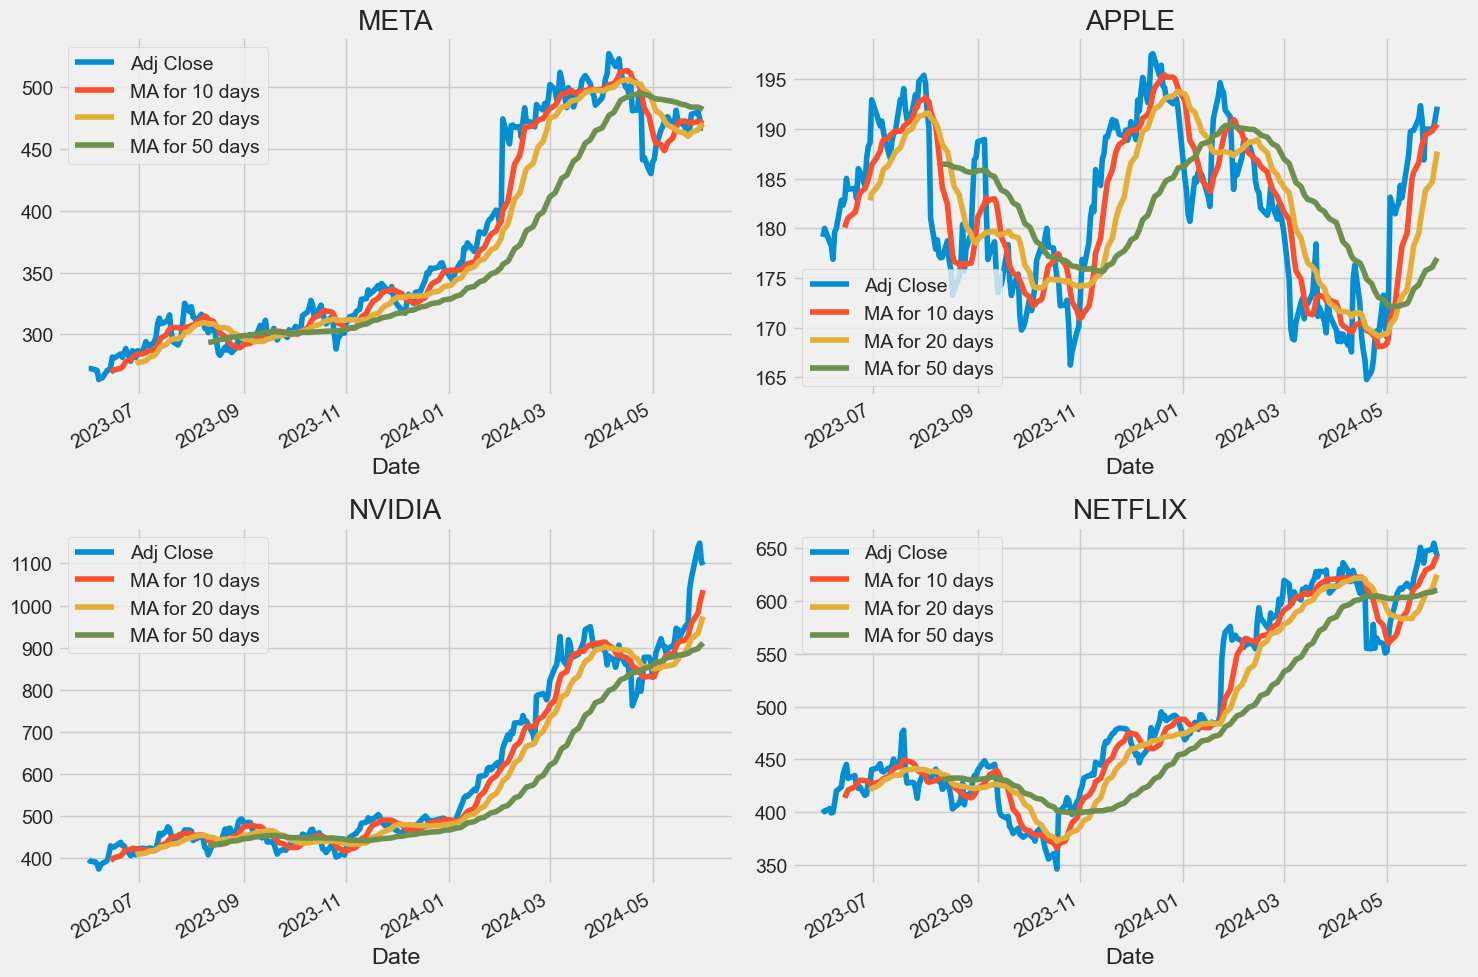

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('META')
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('APPLE')
NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('NVIDIA')
NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NETFLIX')
fig.tight_layout()

# 7. Extract relevant features from raw financial data
##### Calculate daily returns and visualize them.

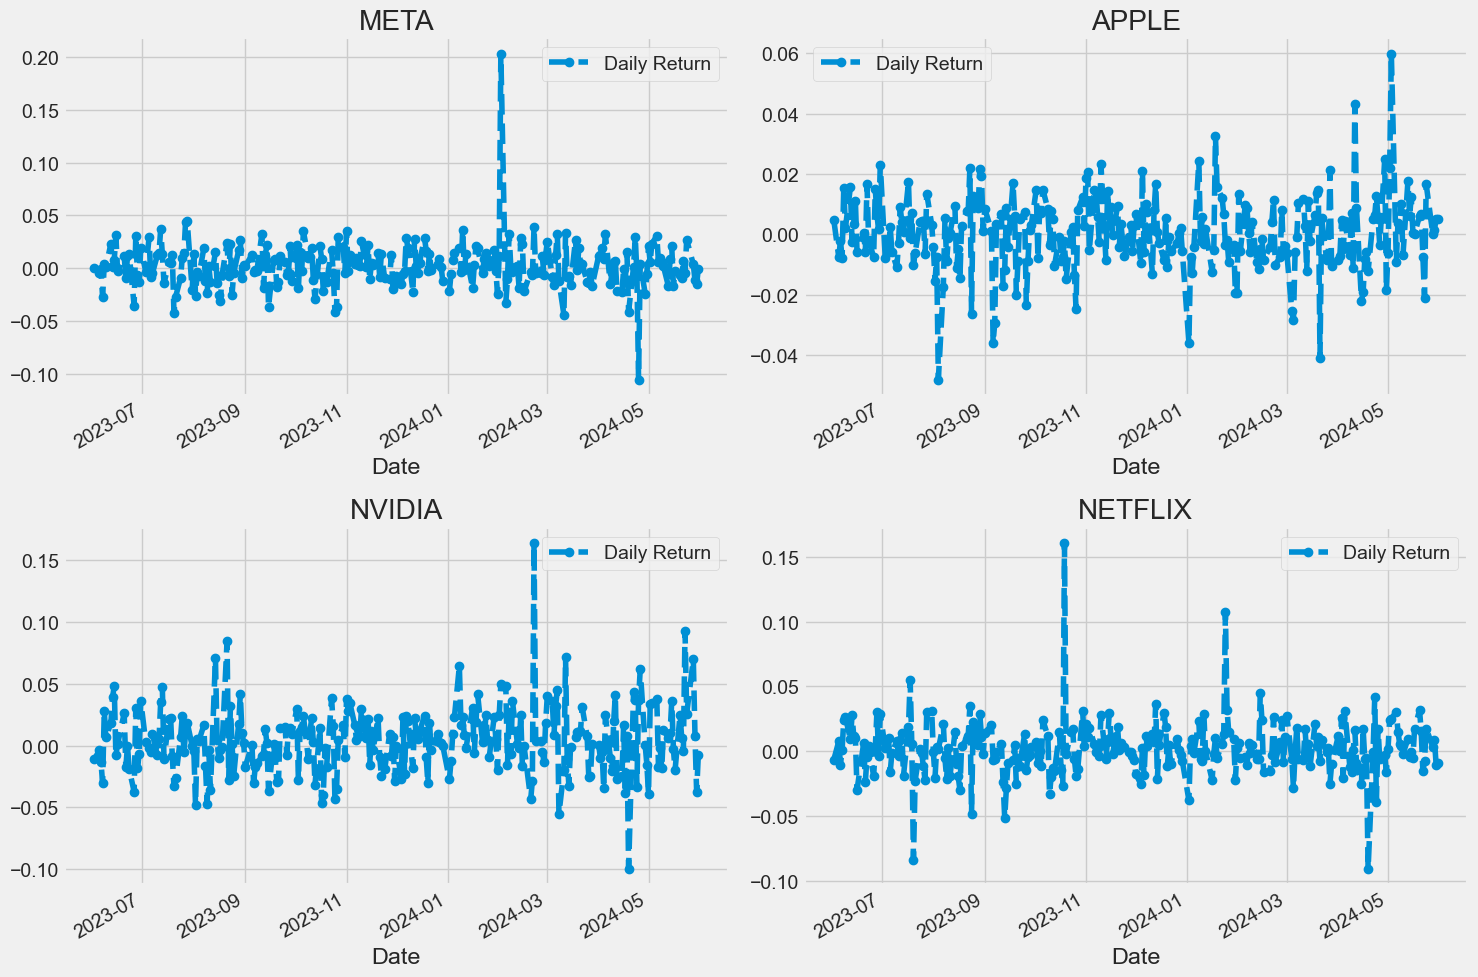

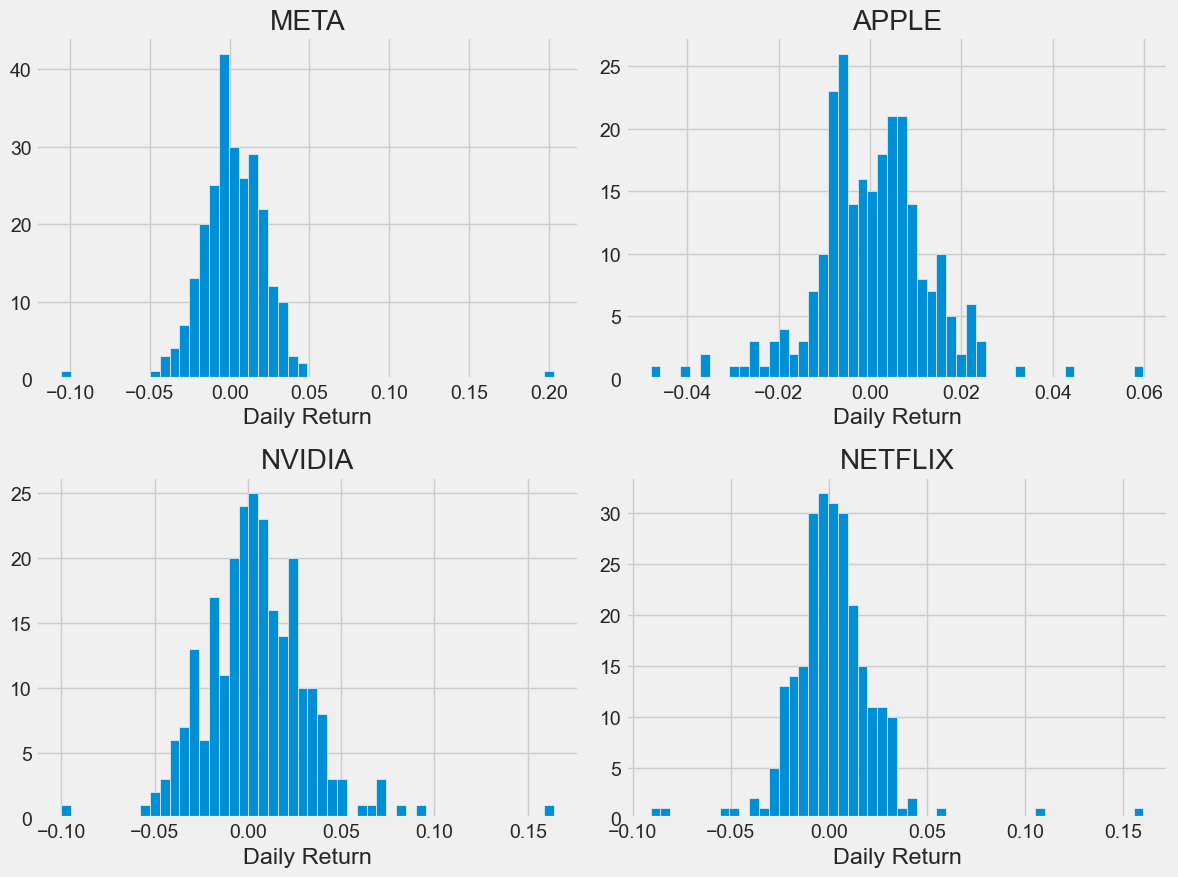

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
META['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('META')
AAPL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('APPLE')
NVDA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NVIDIA')
NFLX['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('NETFLIX')
fig.tight_layout()

plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


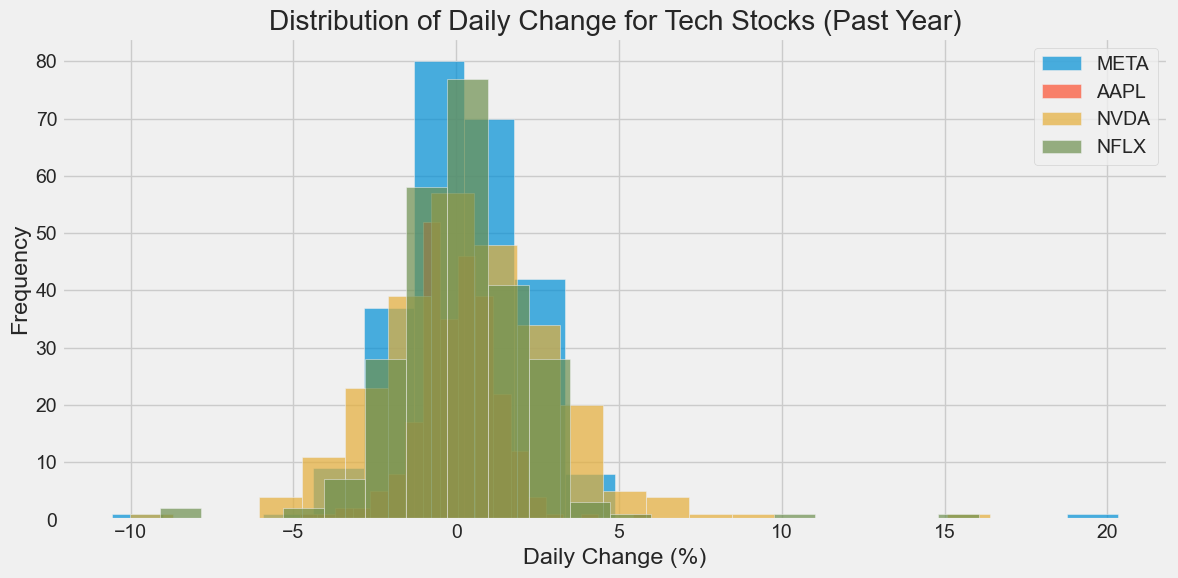

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define company tickers
tech_list = ['META', 'AAPL', 'NVDA', 'NFLX']

# Download stock data for the past year
end = pd.to_datetime('2024-05-27')
start = end - pd.DateOffset(years=1)
company_list = []
for stock in tech_list:
    company_list.append(yf.download(stock, start=start, end=end))

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again

# Calculate daily percentage change
for company in company_list:
    company['Daily Change'] = company['Adj Close'].pct_change() * 100

# Create histogram (one plot for all companies)
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_list):
    # Overlay histograms on the same plot with different transparency levels
    plt.hist(company['Daily Change'], bins=20, alpha=0.7, label=tech_list[i])  
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Change for Tech Stocks (Past Year)')
plt.legend()  # Add legend to identify each company's distribution
plt.tight_layout()

# ... (Rest of the code for identifying best/worst performers and displaying additional info)

plt.show()

# 8. Implement data transformation techniques
##### Calculate correlations and visualize them using heatmaps and pair plots.

[                       0%%                      ]

[*********************100%%**********************]  4 of 4 completed


Text(0.5, 1.0, 'Correlation of stock closing price')

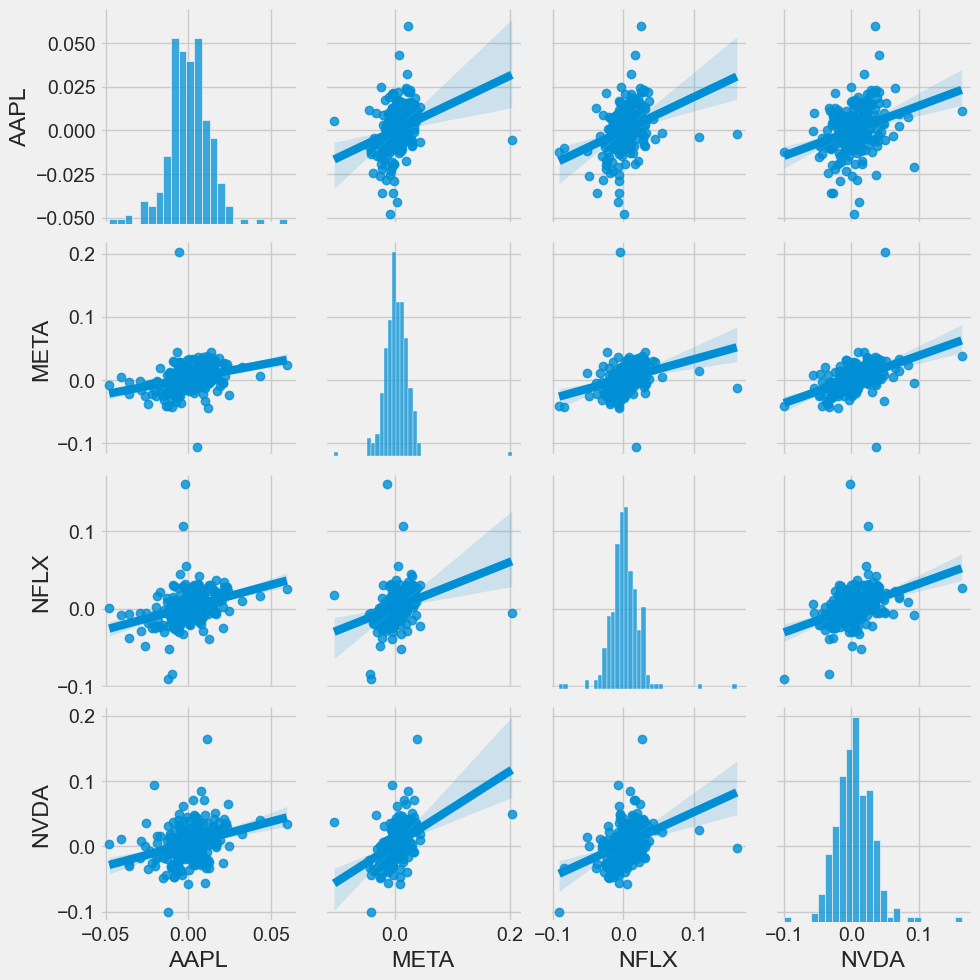

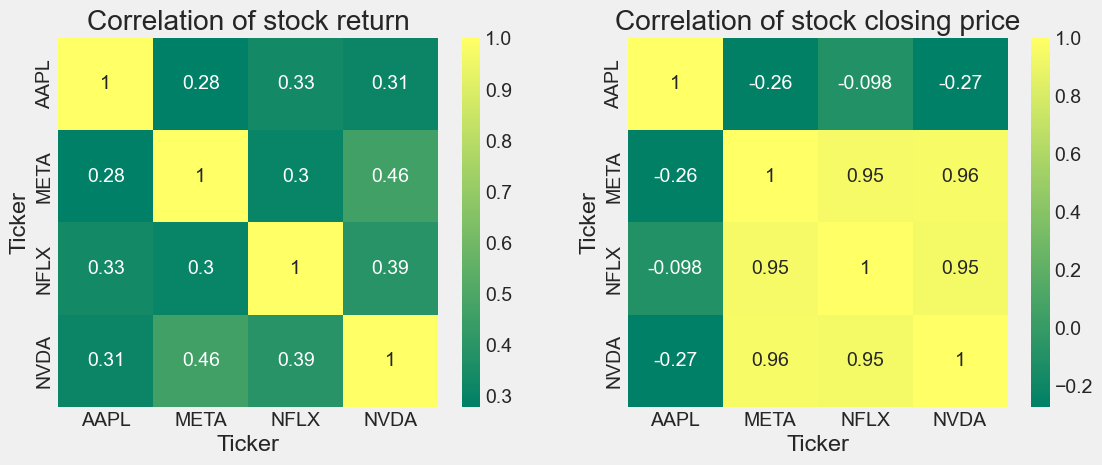

In [9]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()

sns.pairplot(tech_rets, kind='reg')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 9. Split the preprocessed data into training, validation, and test sets
##### Split the data for model training and validation.

In [10]:
from sklearn.model_selection import train_test_split

# Drop missing values from both tech_rets and closing_df
tech_rets_cleaned = tech_rets.dropna()
closing_df_cleaned = closing_df.dropna()

# Align the number of rows in tech_rets_cleaned and closing_df_cleaned
min_rows = min(tech_rets_cleaned.shape[0], closing_df_cleaned.shape[0])
tech_rets_cleaned = tech_rets_cleaned[:min_rows]
closing_df_cleaned = closing_df_cleaned[:min_rows]

# Create X and y after handling missing values
X = tech_rets_cleaned.values
y = closing_df_cleaned.values

# Print the shapes of X and y for verification
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of X: (249, 4)
Shape of y: (249, 4)


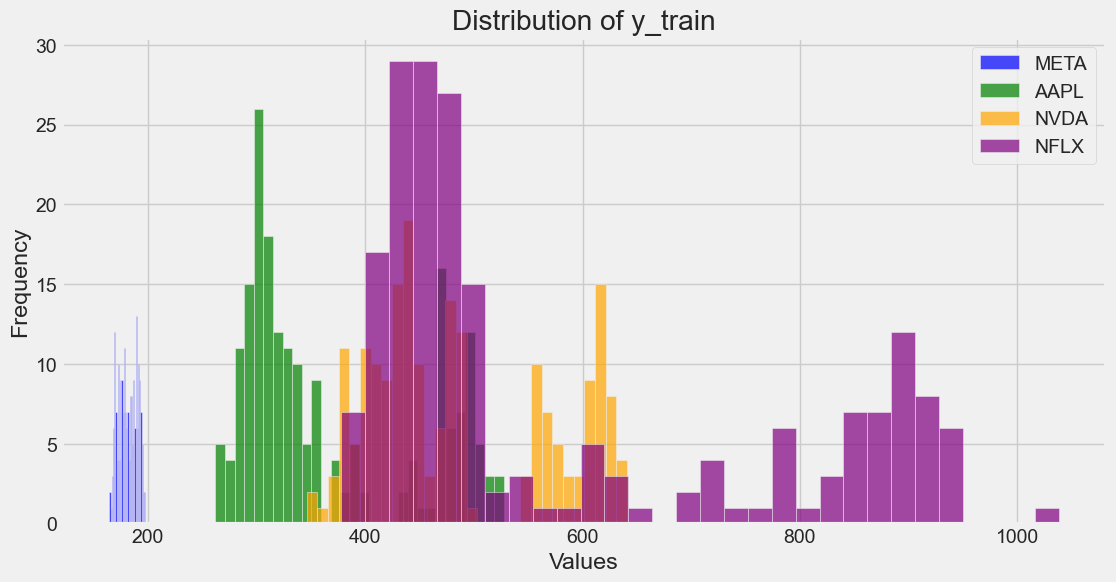

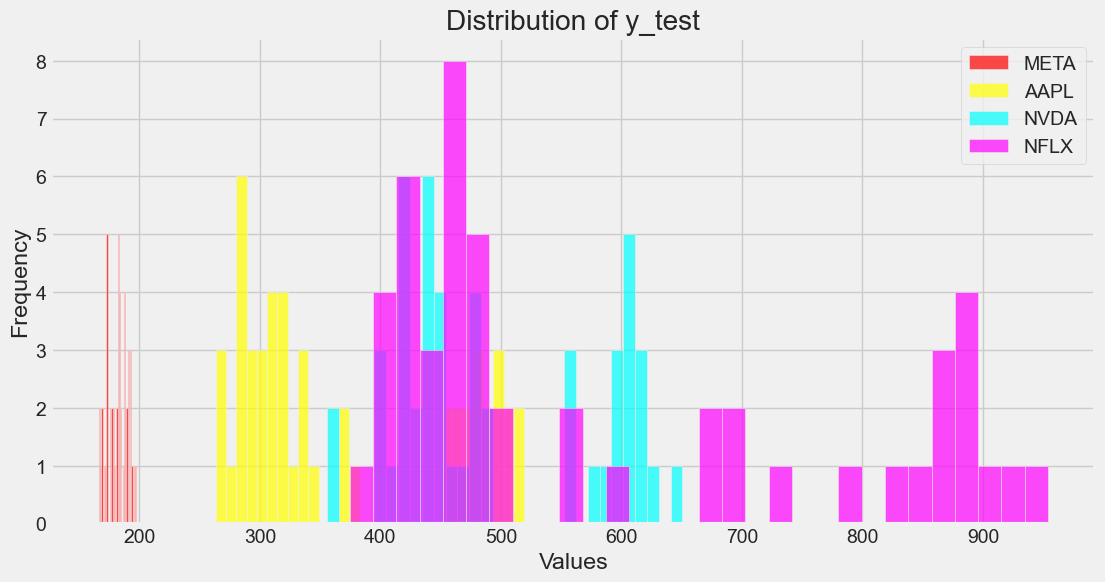

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for the histograms
train_colors = ['blue', 'green', 'orange', 'purple']  # Adjust as needed
test_colors = ['red', 'yellow', 'cyan', 'magenta']    # Adjust as needed

# Plot the distribution of y_train
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_train.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=train_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the distribution of y_test
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_test.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=test_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_test')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 10. Document data collection and preprocessing procedures
##### Keep thorough documentation of each step for reproducibility.

## Documentation
### Data Collection
- Data sourced from Yahoo Finance using yfinance library.
- Stock symbols: AAPL, GOOG, MSFT, AMZN.
- Time period: Last one year.

### Data Preprocessing
- Filled missing values using forward fill.
- Added company name column.
- Concatenated individual stock data into a single DataFrame.

### Data Standardization
- Ensured consistent date format.
- Handled missing values.

### Data Visualization
- Plotted closing prices and volume of sales.
- Calculated and plotted moving averages (10, 20, 50 days).
- Visualized daily returns using histograms and line plots.

### Feature Extraction
- Calculated daily returns.
- Analyzed correlations between stock returns using heatmaps and pair plots.

### Data Splitting
- Split data into training and test sets for model validation.

## Conclusion

In this notebook, we delved into the world of stock market data analysis. Here's a summary of what we explored:

- We learned how to retrieve stock market data from Yahoo Finance using the yfinance library.
- Using Pandas, Matplotlib, and Seaborn, we visualized time-series data to gain insights into the stock market trends.
- We measured the correlation between different stocks to understand how they move in relation to each other.
- We assessed the risk associated with investing in a particular stock by analyzing its daily returns.
- Lastly, we split the data into training and validation sets for further analysis and model training.

If you have any questions or need further clarification on any topic covered in this notebook, feel free to ask in the comments below. I'll be happy to assist you!

References:
- [Investopedia on Correlation](https://www.investopedia.com/terms/c/correlation.asp)
- file:///C:/Users/Admin/Desktop/C_AIML/semestert2/AI%20for%20Business/article1.pdf
- https://medium.com/@ethan.duong1120/stock-data-analysis-project-python-1bf2c51b615f
  